In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns
import math

In [2]:
datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0300-01.SALT.nc')
plotvaru = datau.variables['SALT']
lontu = datau.variables['TLONG'][0:601,200:2000]
lattu = datau.variables['TLAT'][0:601,200:2000]
#plotvaru[plotvaru == -1.0] = np.nan
#plotvaru[plotvaru >  1000] = np.nan

In [3]:
###### wide A1 (KM)
a = np.arange(0,600)
A1= np.zeros([600,1800])
for i in a:
    A1[i,:] = (lattu[i+1,:]-lattu[i,:])*110.95

In [4]:
A1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [7.08747745, 7.08747745, 7.08747745, ..., 7.08747745, 7.08747745,
        7.08747745],
       [7.09700295, 7.09700295, 7.09700295, ..., 7.09700295, 7.09700295,
        7.09700295],
       [7.10653239, 7.10653239, 7.10653239, ..., 7.10653239, 7.10653239,
        7.10653239]])

In [5]:
### depth (CM)
depth=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/depth.nc')
Depth = depth.variables['dz']

In [6]:
Depth[:]

array([ 1000.    ,  1000.    ,  1000.    ,  1000.    ,  1000.    ,
        1000.    ,  1000.    ,  1000.    ,  1000.    ,  1000.    ,
        1000.    ,  1000.    ,  1000.    ,  1000.    ,  1000.    ,
        1000.    ,  1019.6808,  1056.4484,  1105.9951,  1167.807 ,
        1242.4133,  1330.9678,  1435.141 ,  1557.1259,  1699.6796,
        1866.2124,  2060.9023,  2288.852 ,  2556.247 ,  2870.575 ,
        3240.8372,  3677.7725,  4194.031 ,  4804.2236,  5524.7544,
        6373.192 ,  7366.945 ,  8520.893 ,  9843.658 , 11332.466 ,
       12967.199 , 14705.344 , 16480.709 , 18209.135 , 19802.234 ,
       21185.957 , 22316.51  , 23186.494 , 23819.45  , 24257.217 ,
       24546.78  , 24731.014 , 24844.328 , 24911.975 , 24951.291 ,
       24973.594 , 24985.96  , 24992.674 , 24996.244 , 24998.11  ,
       25000.    , 25000.    ], dtype=float32)

In [20]:
### stream fuction
datau=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/z287-09try3.nc')
U = datau.variables['psi'][:]/10




In [21]:
U[0,:,:]

array([[ -6907.2197,  -6907.2197,  -6907.2197, ...,  -6907.2197,
         -6907.2197,  -6907.2197],
       [ -6900.944 ,  -6900.982 ,  -6901.0205, ...,  -6900.8296,
         -6900.868 ,  -6900.9053],
       [ -6892.8994,  -6892.9736,  -6893.048 , ...,  -6892.678 ,
         -6892.7515,  -6892.825 ],
       ...,
       [-47731.746 , -47732.574 , -47733.41  , ..., -47729.3   ,
        -47730.11  , -47730.926 ],
       [-48188.26  , -48188.445 , -48188.633 , ..., -48187.75  ,
        -48187.914 , -48188.086 ],
       [-48652.633 , -48652.633 , -48652.633 , ..., -48652.633 ,
        -48652.633 , -48652.633 ]], dtype=float32)

In [22]:
AA = plotvaru[0,:,:600,200:2000]

In [23]:
AA[AA==-1000]=np.nan
AA[AA.mask]=np.nan

In [24]:
### add AA mask to U  
UU = AA*U/AA

In [25]:
 ###### U*Depth (depth is in cm, so /100 to get m)
a = np.arange(0,62)
Final2= np.zeros([62,600,1800])
for i in a:
    Final2[i,:,:] = UU[i,:,:] * Depth[i]/100


In [26]:
stream = np.nansum(Final2,axis=0)

In [27]:
st = stream/1000000 # to Sv

In [28]:
datav=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0287-09.UVEL.nc')
plotvarv = datav.variables['UVEL'][0,:,:]
lontv = datav.variables['ULONG'][:,:]
lattv = datav.variables['ULAT'][:,:]


In [29]:
LON = lontv[0:600,200:2000]
LAT = lattv[0:600,200:2000]
##U = plotvaru[0,:,:][230:,600:1300]

In [30]:
LON[LON == -1.0] = np.nan
LAT[LAT == -1.0] = np.nan
LON[:,889] = -1

In [41]:
        # Pick some of the nicer colors from the palette...
        nice_cmap=plt.get_cmap('jet')
        lev_cmap = nice_cmap([10,20,30,40,50,60,70,80,90,100,110,120,140,150,160,170,180,190,200,240])
        #new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
        new_cmap = cols.ListedColormap(lev_cmap,"jet")
        nice_levels = [-60000000,-50000000,-40000000,-30000000,-20000000,-10000000,0,5000000,10000000,13000000,16000000,17000000,23000000,25000000]
        #nice_levels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
        nice_levels = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44]
        #nice_levels = [5,10,15,20,25,30,35,40,45,50,55,60,65]
        norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


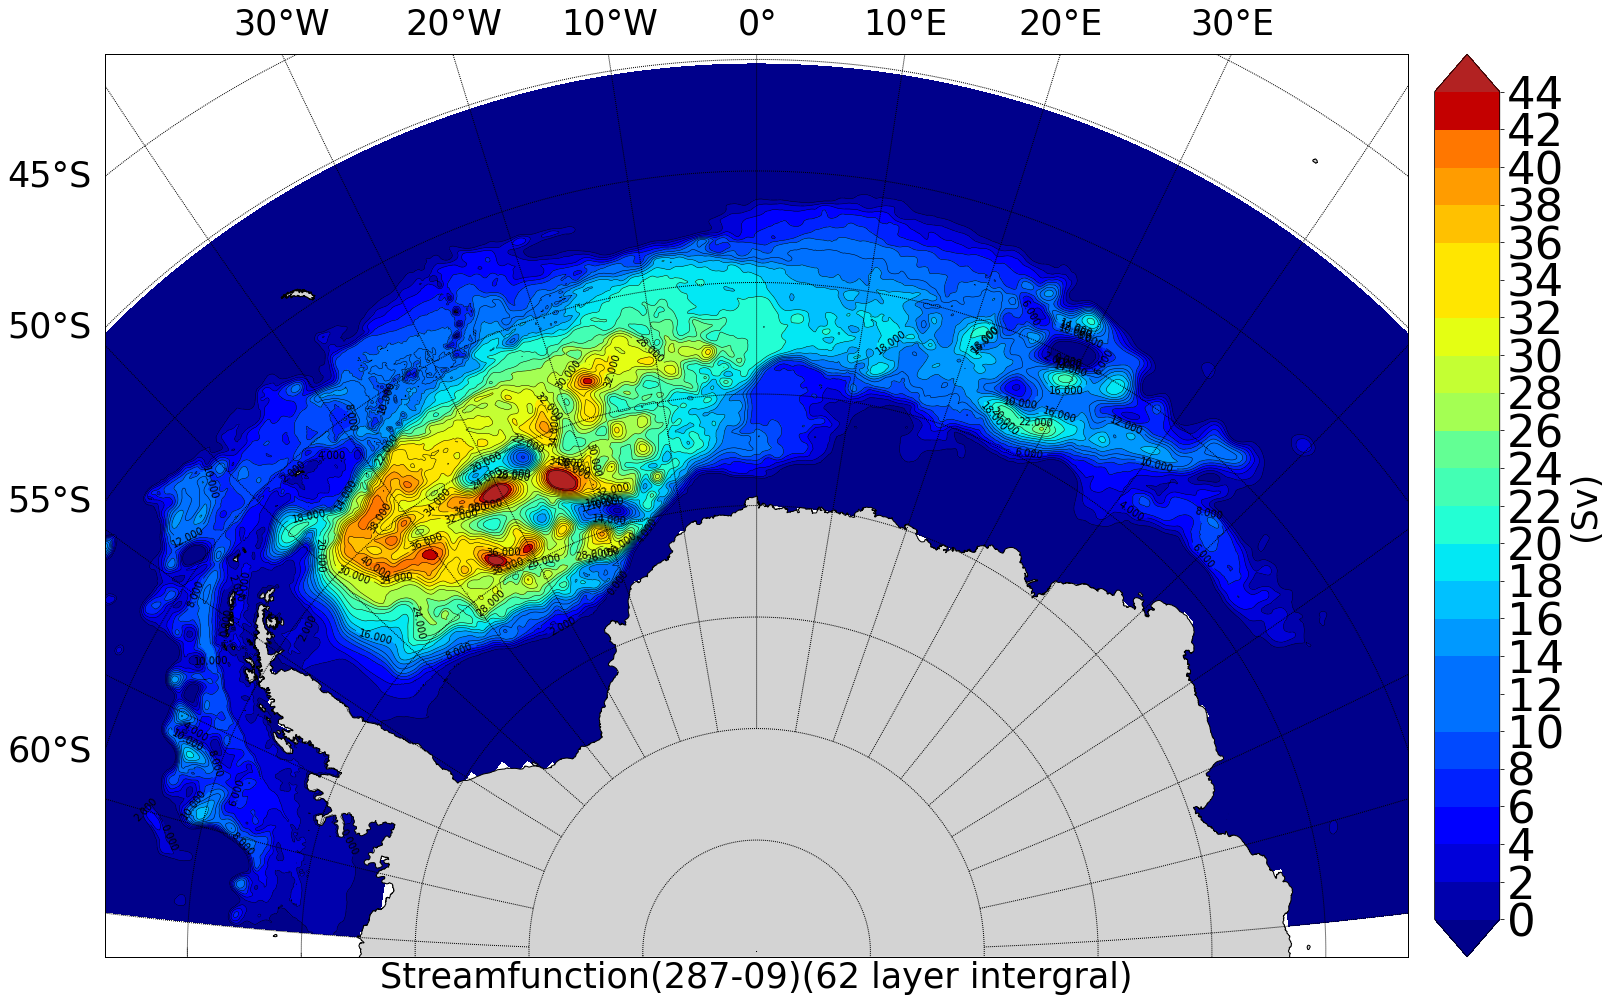

In [42]:


plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -70, lon_0 = 0,area_thresh = 100,\
                     width = 6500000,height = 4500000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(LON,LAT)


CP = map.contourf(x,y,st,cmap = new_cmap,levels = nice_levels,extend='both')
MP = map.contour(x,y,st,levels = nice_levels,colors = 'black', linestyles = 'solid',linewidths=0.5)
plt.clabel(MP, inline=1, fontsize=10)
CP.cmap.set_over('firebrick')
CP.cmap.set_under('darkblue')
cbar =map.colorbar(CP,extend='both',extendfrac='auto',ticks= nice_levels)
cbar.set_label('(Sv)', **my_font)
cbar.ax.tick_params(labelsize=45)
plt.xlabel("Streamfunction(287-09)(62 layer intergral)",**my_font)
plt.savefig("Stream200.png")